In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2
import pickle


### Reading dataset

In [131]:
house_price = pd.read_csv('/home/hasan/DATA SET/Bengaluru_House_Data.csv')

### Simple Introduction of dataset

In [132]:
house_price.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [133]:
house_price.shape

(13320, 9)

In [134]:
house_price.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

### Dropping Unnecessary column

In [135]:
house_price.drop('availability', axis=1, inplace=True)

In [136]:
house_price.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Counting null data

In [137]:
house_price.isnull().sum()

area_type        0
location         1
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

### Replacing null data

In [138]:
# replacing null data of location, size, bath and balcony column
location_mode = house_price['location'].mode()[0]
size_mode = house_price['size'].mode()[0]
society_mode = house_price['society'].mode()[0]
bath_mean = int(house_price['bath'].mean())
balcony_mean = int(house_price['balcony'].mean())

house_price['location'].fillna(location_mode, inplace=True)
house_price['size'].fillna(size_mode, inplace=True)
house_price['society'].fillna(society_mode, inplace=True)
house_price['bath'].fillna(bath_mean, inplace=True)
house_price['balcony'].fillna(balcony_mean, inplace=True)


In [139]:
house_price.isnull().sum()

area_type     0
location      0
size          0
society       0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [140]:
house_price.head(10)

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,Old Airport Road,4 BHK,Jaades,2732,4.0,1.0,204.00
7,Super built-up Area,Rajaji Nagar,4 BHK,Brway G,3300,4.0,1.0,600.00
8,Super built-up Area,Marathahalli,3 BHK,GrrvaGr,1310,3.0,1.0,63.25
9,Plot Area,Gandhi Bazar,6 Bedroom,GrrvaGr,1020,6.0,1.0,370.00


### Checking Different Categorical Data of Column

In [141]:
#different area in area_type column
house_price['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [142]:
#Total unique location
house_price['location'].nunique()

1305

In [143]:
#Total different size
house_price['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [144]:
house_price['society'].nunique()

2688

### preprocessing of size column

In [145]:
house_price['Num_bed_room'] = house_price['size'].apply(lambda x: int(x.split(' ')[0]))
house_price.drop('size', axis=1, inplace=True)
house_price.head()

,area_type,location,society,total_sqft,bath,balcony,price,Num_bed_room
0,Super built-up Area,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,GrrvaGr,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,GrrvaGr,1200,2.0,1.0,51.00,2


### preprocessing of total_sqft column

In [146]:
#unique data of total_sqft column
house_price['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [147]:
#checking without float data

def is_float(data):
    try:
        float(data)
    except:
        return False
    return True

house_price[~house_price['total_sqft'].apply(is_float)].head(40)


,area_type,location,society,total_sqft,bath,balcony,price,Num_bed_room
30,Super built-up Area,Yelahanka,LedorSa,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,Devanahalli,BrereAt,3010 - 3410,2.0,1.0,192.000,4
81,Built-up Area,Hennur Road,Gollela,2957 - 3450,2.0,1.0,224.500,4
122,Super built-up Area,Hebbal,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,Vaarech,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,MCvarar,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,Devanahalli,Jurdsig,1520 - 1740,2.0,1.0,74.820,3
410,Super built-up Area,Kengeri,GrrvaGr,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,Shxorm,1195 - 1440,2.0,0.0,63.770,2


In [148]:
house_price['total_sqft'] = house_price['total_sqft'].str.replace('Sq. Meter', '')
house_price['total_sqft'] = house_price['total_sqft'].str.replace('Acres', '')
house_price['total_sqft'] = house_price['total_sqft'].str.replace('Sq. Yards', '')
house_price['total_sqft'] = house_price['total_sqft'].str.replace('Perch', '')


In [149]:
# changing data type to float

def data_type_to_float(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0]) + float(token[1]))/2
    
    try:
        return float(x)
    except:
        None
        
house_price['total_sqft'] = house_price['total_sqft'].apply(data_type_to_float)


In [150]:
house_price.head()

,area_type,location,society,total_sqft,bath,balcony,price,Num_bed_room
0,Super built-up Area,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,GrrvaGr,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,GrrvaGr,1200.0,2.0,1.0,51.00,2


In [151]:
#multiply price column with 100000
house_price['price'] = house_price['price'] * 100000
house_price.head()

,area_type,location,society,total_sqft,bath,balcony,price,Num_bed_room
0,Super built-up Area,Electronic City Phase II,Coomee,1056.0,2.0,1.0,3907000.0,2
1,Plot Area,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,12000000.0,4
2,Built-up Area,Uttarahalli,GrrvaGr,1440.0,2.0,3.0,6200000.0,3
3,Super built-up Area,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,9500000.0,3
4,Super built-up Area,Kothanur,GrrvaGr,1200.0,2.0,1.0,5100000.0,2


### Changing Data types

In [152]:
house_price['bath'] = house_price['bath'].astype('int')
house_price['balcony'] = house_price['balcony'].astype('int')
house_price['Num_bed_room'] = house_price['Num_bed_room'].astype('int')


In [153]:
house_price.dtypes

area_type        object
location         object
society          object
total_sqft      float64
bath              int64
balcony           int64
price           float64
Num_bed_room      int64
dtype: object

### Exploratory Data Analysis

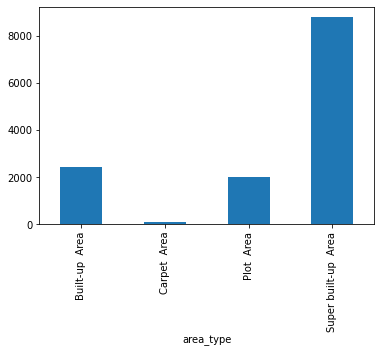

In [154]:
different_area = house_price.groupby('area_type')['area_type'].count()
different_area.plot(kind='bar')

We are seeling that based on area_type column our data is totally unlevel. Super built-up Area is more than any other area around more than 8000. Carpet Area is lowest number compared to other area.

In [155]:
#total location in every area
total_location_in_area = house_price.groupby('area_type').agg({'location': 'count'}) 
total_location_in_area

,location
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [156]:
# minimum, maximum and average price of house in every area
house_price.groupby('area_type')['price'].agg(['min', 'mean', 'max'])

,min,mean,max
area_type,,,
Built-up Area,900000.0,1.042855e+07,205000000.0
Carpet Area,1300000.0,8.950236e+06,50000000.0
Plot Area,844000.0,2.084955e+07,360000000.0
Super built-up Area,800000.0,9.297176e+06,291200000.0


### Removing Outlier

##### area_type column

In [157]:
#counting different area
area_count = house_price.groupby('area_type')['area_type'].agg('count')
area_count

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [158]:
#unique area
house_price['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [159]:
# index of the 'Carpet  Area'
carpet_area_index = house_price[house_price.area_type=='Carpet  Area'].index
carpet_area_index

Int64Index([  297,   340,   352,   594,   622,   629,   642,  1020,  1033,
             1181,  1384,  1420,  1484,  1499,  1605,  1776,  1837,  2087,
             2228,  2756,  2816,  2923,  2932,  3249,  3250,  3341,  3412,
             3424,  3471,  3738,  4061,  4091,  4190,  4237,  4288,  4585,
             4611,  4620,  4853,  4966,  5099,  5153,  5238,  5518,  5709,
             6400,  6862,  7200,  7616,  7911,  7915,  7926,  8140,  8153,
             8248,  8413,  8527,  8597,  8837,  8890,  9245,  9285,  9319,
             9392,  9489,  9734,  9824, 10466, 10541, 10683, 10725, 10791,
            10796, 10899, 10907, 10935, 11502, 11543, 12238, 12398, 12531,
            12882, 13006, 13183, 13214, 13238, 13305],
           dtype='int64')

In [160]:
# dropping some rows those carrry 'Carpet  Area'
house_price.drop(carpet_area_index, axis=0, inplace=True)

##### location column

In [161]:
# total unique locaion
house_price['location'].nunique()


1301

In [162]:
#count every location
location_count = house_price.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_count


location
Whitefield              541
Sarjapur  Road          399
Electronic City         302
Kanakpura Road          267
Thanisandra             234
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
 Anekal                   1
Name: location, Length: 1301, dtype: int64

In [163]:
#location that appear less than 10
less_ten = location_count[location_count<10]
len(less_ten)


1049

In [164]:
#changing those location with are appear less than 10
house_price['location'] = house_price['location'].apply(lambda x:'other_location' if x in less_ten else x)
house_price['location'].nunique()


253

##### society column

In [165]:
house_price['society'].nunique()

2669

In [166]:
#count every location
society_count = house_price.groupby('society')['society'].agg('count').sort_values(ascending=False)
society_count

society
GrrvaGr    5549
PrarePa      76
Sryalan      59
Prtates      59
GMown E      56
           ... 
ShtalCr       1
Leate O       1
ShstaAl       1
Shsom B       1
NDivaOl       1
Name: society, Length: 2669, dtype: int64

In [167]:
#society that appear less than 10
less_ten = society_count[society_count<5]
len(less_ten)


2330

In [168]:
#changing those society with are appear less than 10
house_price['location'] = house_price['society'].apply(lambda x:'other_society' if x in less_ten else x)
house_price['location'].nunique()


340

In [169]:
house_price.shape

(13233, 8)

##### bath column

In [170]:
#unique bath
house_price['bath'].unique()

array([ 2,  5,  3,  4,  6,  1,  9,  8,  7, 11, 10, 14, 27, 12, 16, 40, 15,
       13, 18])

In [171]:
#outlier compared to bath and Num_bed_room
bath_bed = house_price[house_price.bath>house_price.Num_bed_room+2]
bath_bed

,area_type,location,society,total_sqft,bath,balcony,price,Num_bed_room
1078,Plot Area,other_society,Srvasks,3300.0,14,1,50000000.0,9
1953,Plot Area,GrrvaGr,GrrvaGr,1200.0,12,1,11000000.0,8
1979,Plot Area,GrrvaGr,GrrvaGr,990.0,12,0,12000000.0,8
2620,Super built-up Area,Prowshi,Prowshi,11338.0,9,1,100000000.0,6
6838,Super built-up Area,GrrvaGr,GrrvaGr,7500.0,8,3,170000000.0,5
6937,Plot Area,GrrvaGr,GrrvaGr,2600.0,12,1,67500000.0,9
7709,Built-up Area,GrrvaGr,GrrvaGr,2460.0,7,2,8000000.0,4
8106,Plot Area,GrrvaGr,GrrvaGr,1850.0,12,1,30000000.0,8
9974,Plot Area,GrrvaGr,GrrvaGr,2400.0,6,2,77500000.0,3
9990,Plot Area,GrrvaGr,GrrvaGr,1200.0,9,3,12200000.0,6


In [172]:
#dropping rows
house_price.drop(bath_bed.index, axis=0, inplace=True)
house_price.shape

(13217, 8)

### Creating dummies column of categorical column

In [173]:
house_price = pd.get_dummies(house_price)
house_price.head()

,total_sqft,bath,balcony,price,Num_bed_room,area_type_Built-up Area,area_type_Plot Area,area_type_Super built-up Area,location_ARngsd,location_ARureig,...,society_Xeitaa,society_YCnce R,society_YMhenLi,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1ncyRe,society_i1odsne,society_i1rtsCo
0,1056.0,2,1,3907000.0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5,3,12000000.0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2,3,6200000.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3,1,9500000.0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2,1,5100000.0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
house_price.dtypes

total_sqft         float64
bath                 int64
balcony              int64
price              float64
Num_bed_room         int64
                    ...   
society_Zonce E      uint8
society_Zostaa       uint8
society_i1ncyRe      uint8
society_i1odsne      uint8
society_i1rtsCo      uint8
Length: 3016, dtype: object

In [119]:
house_price.dropna(axis=0, inplace=True)

### Selecting Feature and Label data

In [127]:
X = house_price.drop('price', axis=1)
y = house_price['price']


### Dividing dataset for train and test

In [49]:
Xtrain,xtest, Ytrain,ytest = train_test_split(X,y, test_size=.25, random_state=42)

### Model with Hyperparameter Tuning

In [50]:
RFR = RandomForestRegressor(n_estimators=100)

In [51]:
# hyperparameter 
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]


In [52]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [53]:
# using RandomizedSearchCV
RSC = RandomizedSearchCV(estimator = RFR, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)


In [54]:
RSC.fit(Xtrain, Ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  13.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  24.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 50.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=...


In [55]:
predict_with_test_data = RSC.predict(xtest)
predict_with_test_data

array([ 6174883.31499904,  7700043.7402121 , 23042212.436534  , ...,
        4717041.64728976,  5162034.09931763,  7953822.56009963])

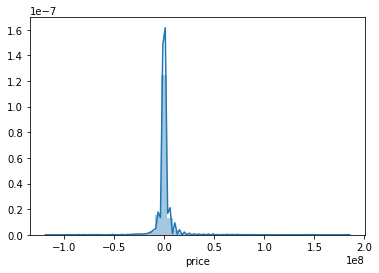

In [56]:
# checking predicted accuracy 
sns.distplot(ytest-predict_with_test_data)

Figure have positive kurtosis.

From the figure we are seeing that most of the difference nearest to zero. So We can say our model is very good.

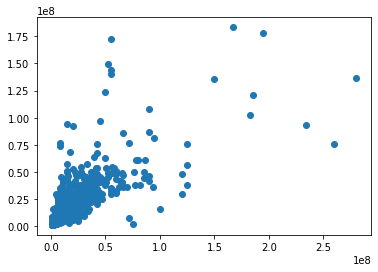

In [57]:
# checking predicted accuracy using scatter plot
plt.scatter(ytest,predict_with_test_data)

### Model Saving

In [61]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(RSC, open(filename, 'wb'))


### Model Loading

In [63]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


### Predicting with Totally New Data

In [70]:
def predict_price(area, location, society, total_sqft, bath, balcony, Num_bed_room):
    
    loc_area = np.where(X.columns==area)[0]
    loc_location = np.where(X.columns==location)[0]
    loc_society = np.where(X.columns==society)[0]
    
    x = np.zeros(3015)
    x[0] = total_sqft
    x[1] = bath
    x[2] = balcony
    x[3] = Num_bed_room
    
    if (loc_area >=0) and (loc_location>=0) and (loc_society>=0):
        x[loc_area] = 1
        x[loc_location] = 1
        x[loc_society] = 1
    return loaded_model.predict([x])[0]
    

In [71]:
predict_price('Super built-up Area', 'Uttarahalli', 'Theanmp', 1521,3,2,3)

/home/hasan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


8237465.746507229